<h1>This aim of this lab is to study the evolution Apple stock prices of NASDAQ at opening
time.</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Importation of the data.

In [2]:
data_train = pd.read_csv('training_data.csv')
data_test = pd.read_csv('test_data.csv')

We would like to forecast opening stock price which means column 2 “Open”.

In [3]:
data_train = data_train.iloc[:,1:2].values
data_test = data_test.iloc[:,1:2].values

In [5]:
data_test

array([[191.899994],
       [190.300003],
       [199.130005],
       [200.580002],
       [207.029999],
       [208.      ],
       [209.320007],
       [206.050003],
       [209.529999],
       [207.360001],
       [209.309998],
       [210.160004],
       [209.220001],
       [211.75    ],
       [213.440002],
       [218.100006],
       [216.800003],
       [214.100006],
       [214.649994],
       [216.600006],
       [217.149994],
       [219.009995],
       [220.149994],
       [223.25    ],
       [226.509995],
       [228.410004],
       [228.990005],
       [226.229996],
       [221.850006],
       [220.949997],
       [218.009995],
       [224.940002],
       [223.520004],
       [225.75    ],
       [222.149994],
       [217.789993],
       [218.5     ],
       [220.240005],
       [220.779999],
       [216.820007],
       [219.75    ],
       [221.      ],
       [223.820007],
       [224.789993],
       [227.949997],
       [227.25    ],
       [230.050003],
       [230.7

Plot the training set and see what it looks like

In [6]:
data = np.concatenate((data_train,data_test))

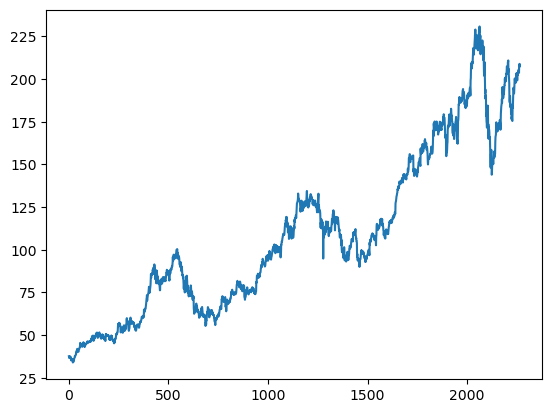

In [7]:
plt.plot(data)
plt.show()

To prevent the learning process to be slow due to data magnitude, normalize the data with features’ scaling with MinMaxScaler.

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.fit_transform(data_test)

In [9]:
data_scaled=np.concatenate((data_train_scaled,data_test_scaled))
data_scaled.shape

(2265, 1)

In [10]:
m_train, n_train = data_train.shape
m_test, n_test = data_test.shape
t_step = 60
y_train = list()
x_train = list()
y_test = list()
x_test = list()

In [11]:
m_train,n_train

(2015, 1)

In [12]:
m_test,n_test

(250, 1)

In [13]:
for i in range(t_step,m_train):
    # Create temporary samples
    sample_x_train = data_train_scaled[i-t_step:i]
    sample_y_train = data_train_scaled[i]

    # Let’s add a padding
    if sample_x_train.shape[0] < t_step:
        print(True)
        var = np.zeros((t_step - sample_x_train.shape[0]),1)
        sample_x_train = np.concatenate((sample_x_train, var), axis = 0)
        sample_y_train = np.concatenate((sample_y_train, var), axis = 0)

    # Adding to the lists x train, y train
    x_train.append(sample_x_train)
    y_train.append(sample_y_train)

In [14]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [15]:
for i in range(t_step,m_test):
  # Create temporary samples
  sample_x_test = data_test_scaled[i-t_step:i]
  sample_y_test = data_test_scaled[i]
  # Let’s add a padding
  if sample_x_test.shape[0] < t_step:
    var = np.zeros((t_step - sample_x_test.shape[0]),1)
    sample_x_test = np.concatenate((sample_x_test, var), axis = 0)
    sample_y_test = np.concatenate((sample_y_test, var), axis = 0)
  # Adding to the lists x train, y train
  x_test.append(sample_x_test)
  y_test.append(sample_y_test)

In [16]:
x_test = np.array(x_test)
y_test = np.array(y_test)

We now build a LSTM model.

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'tanh', return_sequences = True, batch_size= (None, t_step, 1)))
model.add(Dropout(0.1))
model.add(LSTM(units = 50, activation = 'tanh', return_sequences= False))
model.add(Dropout(0.1))
model.add(Dense(units = 1))

Compile this model using the optimizer adam and the MSE loss

In [18]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

Train the model

In [19]:
m_test = y_test.shape[0]
n_boot=10
y_boot=np.zeros((m_test,n_boot))

In [20]:
for i in range(n_boot):
  history=model.fit(x_train,y_train,epochs=5,batch_size=32)
  pred=model.predict(x_test)
  pred=np.reshape(pred,(pred.shape[0]))
  y_boot[:,i]=pred

Epoch 1/5
62/62 [==============================] - 6s 36ms/step - loss: 0.0138 - accuracy: 5.1151e-04
Epoch 2/5
62/62 [==============================] - 2s 36ms/step - loss: 0.0018 - accuracy: 5.1151e-04
Epoch 3/5
62/62 [==============================] - 2s 37ms/step - loss: 0.0017 - accuracy: 5.1151e-04
Epoch 4/5
62/62 [==============================] - 2s 36ms/step - loss: 0.0017 - accuracy: 5.1151e-04
Epoch 5/5
6/6 [==============================] - 1s 13ms/step
Epoch 1/5
62/62 [==============================] - 2s 36ms/step - loss: 0.0015 - accuracy: 5.1151e-04
Epoch 2/5
62/62 [==============================] - 2s 36ms/step - loss: 0.0014 - accuracy: 5.1151e-04
Epoch 3/5
62/62 [==============================] - 2s 36ms/step - loss: 0.0015 - accuracy: 5.1151e-04
Epoch 4/5
62/62 [==============================] - 2s 36ms/step - loss: 0.0012 - accuracy: 5.1151e-04
Epoch 5/5
6/6 [==============================] - 0s 15ms/step
Epoch 1/5
62/62 [==============================] - 2s 36ms/s

Plot the loss

In [21]:
history.history['loss']

[0.0005739756161347032,
 0.0006347044254653156,
 0.0006256951601244509,
 0.0005947420722804964,
 0.0005994817474856973]

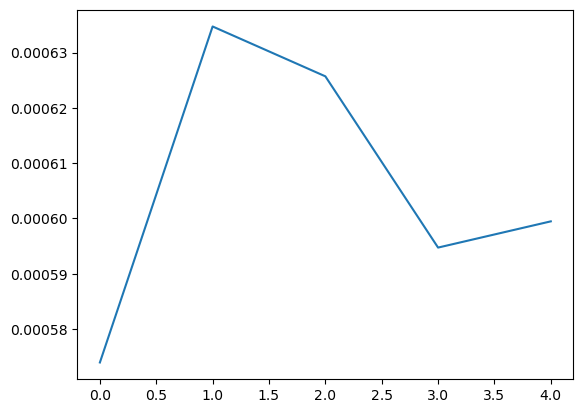

In [22]:
plt.figure()
plt.plot(history.history['loss'])

Compare predictions and y test

In [ ]:
plt.figure()
plt.plot(y_test,label='y_test')
plt.plot(y_boot[:,9],label='y_pred')
plt.xlabel('Time')
plt.ylabel('Stock price at opening')

Compute median prediction and CIs. Visualize the prediction and confidence intervals

In [27]:
# Median prediction
median_value = np.percentile(y_train, 50)
# Confidence prediction
CIs_lower = np.percentile(y_train, 2.5, axis=1)
CIs_upper = np.percentile(y_train, 97.5, axis=1)
for i in range(m_test):
    print("Test example %d: Median prediction = %.2f, 95%% CI = [%.2f, %.2f]" % (i,median_value, CIs_lower[i], CIs_upper[i]))

Test example 0: Median prediction = 0.39, 95% CI = [0.07, 0.07]
Test example 1: Median prediction = 0.39, 95% CI = [0.06, 0.06]
Test example 2: Median prediction = 0.39, 95% CI = [0.06, 0.06]
Test example 3: Median prediction = 0.39, 95% CI = [0.06, 0.06]
Test example 4: Median prediction = 0.39, 95% CI = [0.06, 0.06]
Test example 5: Median prediction = 0.39, 95% CI = [0.06, 0.06]
Test example 6: Median prediction = 0.39, 95% CI = [0.06, 0.06]
Test example 7: Median prediction = 0.39, 95% CI = [0.06, 0.06]
Test example 8: Median prediction = 0.39, 95% CI = [0.06, 0.06]
Test example 9: Median prediction = 0.39, 95% CI = [0.07, 0.07]
Test example 10: Median prediction = 0.39, 95% CI = [0.07, 0.07]
Test example 11: Median prediction = 0.39, 95% CI = [0.07, 0.07]
Test example 12: Median prediction = 0.39, 95% CI = [0.07, 0.07]
Test example 13: Median prediction = 0.39, 95% CI = [0.07, 0.07]
Test example 14: Median prediction = 0.39, 95% CI = [0.07, 0.07]
Test example 15: Median prediction 

In [25]:
# Confidence prediction
y_pred_median = np.median(y_boot, axis=1)
y_pred_ci_lower = np.percentile(y_boot, 2.5, axis=1)
y_pred_ci_upper = np.percentile(y_boot, 97.5, axis=1)
# Print results
for i in range(m_test):
    print("Test example %d: Median prediction = %.2f, 95%% CI = [%.2f, %.2f]" % (i,y_pred_median[i], y_pred_ci_lower[i], y_pred_ci_upper[i]))

Test example 0: Median prediction = 0.87, 95% CI = [0.85, 0.91]
Test example 1: Median prediction = 0.86, 95% CI = [0.85, 0.91]
Test example 2: Median prediction = 0.87, 95% CI = [0.85, 0.91]
Test example 3: Median prediction = 0.86, 95% CI = [0.85, 0.90]
Test example 4: Median prediction = 0.86, 95% CI = [0.84, 0.90]
Test example 5: Median prediction = 0.86, 95% CI = [0.84, 0.90]
Test example 6: Median prediction = 0.85, 95% CI = [0.83, 0.89]
Test example 7: Median prediction = 0.84, 95% CI = [0.83, 0.88]
Test example 8: Median prediction = 0.84, 95% CI = [0.83, 0.88]
Test example 9: Median prediction = 0.83, 95% CI = [0.81, 0.87]
Test example 10: Median prediction = 0.81, 95% CI = [0.79, 0.86]
Test example 11: Median prediction = 0.79, 95% CI = [0.76, 0.84]
Test example 12: Median prediction = 0.77, 95% CI = [0.73, 0.83]
Test example 13: Median prediction = 0.75, 95% CI = [0.72, 0.82]
Test example 14: Median prediction = 0.74, 95% CI = [0.72, 0.81]
Test example 15: Median prediction 